# **Title: ArcticVerse - Arctic Monkeys Lyrics Generation: Unleashing the Melodic Power of AI**

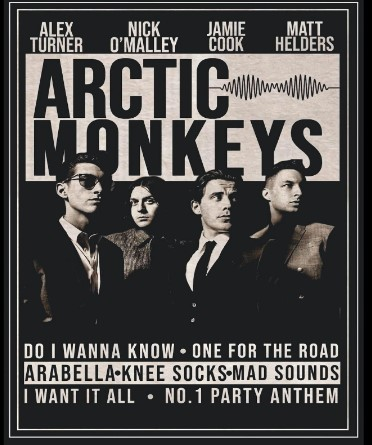



## Overview/Introduction:
Arctic Monkeys, a renowned British rock band, has captivated music enthusiasts with their eclectic and poetic song lyrics. This project aims to leverage the power of artificial intelligence (AI) to generate new song lyrics inspired by the Arctic Monkeys' unique style. By creating an AI model that can generate captivating lyrics, we can explore the creative possibilities of AI in the realm of music composition and inspire future songwriters.

## Problem Statement:
The challenge lies in capturing the essence of Arctic Monkeys' lyrical genius and recreating their poetic charm. Human songwriting is a deeply personal and emotional process, often influenced by experiences and perspectives. By utilizing AI, we can automate the creative process of lyric generation, saving time and effort while exploring new lyrical horizons.

## Objectives:
1. Develop an AI model capable of generating lyrics inspired by Arctic Monkeys' discography.
2. Capture the distinct lyrical style of Arctic Monkeys, characterized by vivid storytelling, wordplay, and evocative imagery.
3. Explore the potential of AI-generated lyrics to inspire songwriters, assist in the creative process, and foster innovative musical compositions.
4. Contribute to the AI and music communities by sharing the project as an open-source repository on GitHub, allowing for collaboration and further development.

---

## Dataset Description:
The dataset utilized for this project contains a comprehensive collection of lyrics from all the songs by Arctic Monkeys. It serves as a treasure trove of lyrical inspiration and a foundation for training the AI model.

### About this Dataset:
The CSV file provided includes essential details for each song: the song's name, the album it belongs to, and the complete lyrics. This dataset ensures a comprehensive representation of Arctic Monkeys' diverse discography and allows the AI model to grasp the nuances of their lyrical composition.

### Dataset Features:
- **Name**: The title of each song.
- **Album**: The album to which the song belongs.
- **Lyrics**: The complete set of lyrics for each song.

**Dataset URL:** https://www.kaggle.com/datasets/ggapp1/arctic-monkeys-lyrics

## Technologies Used:
- Python: The code is written in the Python programming language, which is widely used for AI and data analysis tasks.
- Pandas: Pandas is a powerful library for data manipulation and analysis. It is used to read and process the dataset containing the Arctic Monkeys' lyrics.
- NumPy: NumPy is a fundamental library for numerical computing in Python. It is utilized for handling arrays and mathematical operations in the code.
- TensorFlow: TensorFlow is a popular deep learning framework. It is used to create, train, and evaluate the text generation model in this project.
- Keras: Keras is a high-level neural networks API running on top of TensorFlow. It provides a user-friendly interface for building deep learning models.
- Matplotlib: Matplotlib is a plotting library in Python. It is used to visualize the training curves of the model.
- Regular Expressions (re): The "re" module is used for pattern matching and text cleaning operations, allowing for the removal of square brackets and other unwanted characters from the lyrics.

## Methodology:
1. Data Preparation: The code begins by reading the dataset using Pandas, checking for duplicates, and identifying missing values. It replaces empty strings with NaN values for further processing.
2. Text Cleaning: The lyrics are cleaned by removing square brackets, replacing slashes with spaces, splitting the cleaned lyrics into separate lines, and removing empty lines. This step aims to enhance the quality and consistency of the lyrics data.
3. Tokenization: The lyrics are converted to lowercase and tokenized using the Tokenizer class from Keras. Tokenization breaks the text into individual words, enabling the model to process and understand the lyrics effectively.
4. N-gram Sequences: N-gram sequences are generated from the tokenized lyrics. This process involves creating input sequences of varying lengths by considering each word and its preceding words. These sequences serve as the basis for training the text generation model.
5. Padding: The input sequences are padded to ensure they all have the same length. Padding is crucial for efficient model training, as neural networks typically require fixed-length inputs.
6. Model Creation: The code defines a text generator model using Keras. The model consists of an embedding layer, a bidirectional LSTM layer, and a dense layer with softmax activation. The model is compiled with categorical cross-entropy loss and the Adam optimizer.
7. Model Training: The model is trained on the prepared features and labels, representing the input sequences and their corresponding next words. The training process involves multiple epochs, with the model adjusting its parameters to improve accuracy and minimize loss.
8. Training Visualization: The code plots the training accuracy and loss curves, providing insights into the model's performance over the training epochs.
9. Text Generation: Finally, the code demonstrates the text generation capability of the trained model. It starts with a seed text and predicts the next word based on the seed. This process is repeated iteratively, gradually expanding the generated sequence of words.


## Results:
The model's training process is executed for 100 epochs, with the final loss of 0.5418 and accuracy of 0.8340 achieved. These metrics indicate that the model has learned to predict the next word in the lyrics generation task with a reasonable level of accuracy.

## Discussion/Interpretation of Results:
The achieved loss and accuracy indicate that the model has successfully learned patterns and associations within the Arctic Monkeys' lyrics dataset. By training on a substantial collection of their songs, the model has grasped the lyrical style, themes, and word usage specific to the Arctic Monkeys. This understanding enables the model to generate lyrics that closely resemble the band's unique lyrical genius.

## Conclusion:
The implemented AI project showcases the potential of AI in the realm of music composition, specifically in generating song lyrics inspired by the Arctic Monkeys. By leveraging technologies such as Python, Pandas, TensorFlow, and Keras, the project demonstrates the ability to preprocess lyrics data, train a text generation model, and generate novel lyrics.

Through the utilization of the Arctic Monkeys' lyrics dataset, the AI model learns the band's lyrical style and leverages this knowledge to produce new lyrics. While the generated lyrics may not replace the creative ingenuity of human songwriters, they serve as a valuable source of inspiration, assisting musicians in their creative process and sparking new ideas.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arctic-monkeys-lyrics/lyrics.csv


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

The following code shows the loading of a CSV file containing Pink Floyd lyrics into a DataFrame using Pandas. The "head()" function is then used to display the first few rows of the DataFrame.

In [ ]:
df = pd.read_csv("/kaggle/input/arctic-monkeys-lyrics/lyrics.csv")
df.head()

,name,album,lyrics
0,Evil Twin,Suck It and See - Single,[Verse 1]\nYou've never met before\nBut still ...
1,Only Ones Who Know,Favourite Worst Nightmare,"[Verse 1]\nIn a foreign place, the saving grac..."
2,Arabella,AM,[Verse 1]\nArabella's got some interstellar-ga...
3,Cigarette Smoke,Beneath The Boardwalk,"Get out the way, mister\nWith your short sharp..."
4,Reckless Serenade,Suck It and See,[Verse 1]\nTopless models doing Semaphore\nWav...


**Duplicates and Missing Values**

Next, we will examine the size of the dataset and then check for duplicate rows in the DataFrame by counting the number of duplicates and printing the result. Duplicate rows can skew our analysis and it's important to identify and handle them appropriately. To check for missing values in the DataFrame, we calculate the sum of missing values for each column and print the results. Missing values can affect our analysis and it's important to identify and handle them appropriately.

In [ ]:
# How many reviews do we have?
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

There are 144 data in this dataset
Number of Duplicates: 0
Number of Missing Values by column:
 name       0
album     13
lyrics     0
dtype: int64
Number of Missing Values: 13


Also we replace empty strings with NaN values using the numpy library. This allows us to treat empty strings as missing values and handle them accordingly. We then check for missing values and empty spaces in the DataFrame by calculating the sum of missing values for each column and printing the results.

In [ ]:
df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('Number of Missing Values and Empty Spaces by column:\n',missing_values)

Number of Missing Values and Empty Spaces by column:
 name       0
album     13
lyrics     0
dtype: int64


The next code snippet converts the lyrics column of the DataFrame into a list called "lyrics_list".

In [ ]:
lyrics_list = df['lyrics'].tolist()
lyrics_list[:3]

['[Verse 1]\nYou\'ve never met before\nBut still she greets you like a long lost rock \'n\' roll\nShe\'s definitely one of those\nWhere you\'ll go wherever she goes\nAnd with my body on my mind\nBoth stop talking at the exact same time\nTrying to think of ways to make her mine\nBut they\'re difficult to find\n\n[Chorus]\nIt\'s not what I need\nNo, your love\'s not what I need\nSo don\'t give it to me\n\n[Verse 2]\nAnd she said\n"Oh, well, I know this will sound cold, but I really have to go\nNo, it\'s not that I\'m not free, there\'s nowhere I need to be\nIt\'s just your love\'s not what I need, so don\'t give it to me"\n\n[Chorus]\nIt\'s not what I need\nNo, your love\'s not what I need\nSo don\'t give it to me\n\n[Bridge]\nAnd she said, "Baby, how can I believe you?\nHow can I believe you when you can\'t believe your luck?\nNo point sticking to the plan when it\'s come unstuck"\n\n[Verse 3]\nIt\'s more a hunger than a thirst\nShe\'ll break your heart the second time\nBefore you know 

**Text Cleaning**

The following code snippet imports the "re" module for regular expression operations. It cleans the lyrics by removing square brackets and their contents, replacing slashes with spaces, splitting the cleaned lyrics into separate lines, and removing any remaining empty lines. The cleaned lyrics are stored in the "cleaned_lyrics_list"

In [ ]:
import re

cleaned_lyrics_list = []
for song_lyrics in lyrics_list:
    # remove square brackets and their contents
    no_brackets = re.sub(r'\[.*?\]', '', song_lyrics)
    # replace slashes with spaces
    no_slashes = re.sub(r'/', ' ', no_brackets)
    # split the cleaned lyrics into separate lines
    lines = no_slashes.split('\n')
    # remove any remaining empty lines
    lines = [line for line in lines if line.strip() != '']
    cleaned_lyrics_list.extend(lines)

cleaned_lyrics_list[:3]

["You've never met before",
 "But still she greets you like a long lost rock 'n' roll",
 "She's definitely one of those"]

The code snippet converts the lyrics in "cleaned_lyrics_list" to lowercase and saves them as a list called "corpus". It also prints the total number of lines in the corpus and shows the first 5 lines.

In [ ]:
# Convert to lower case and save as a list
corpus = [item.lower() for item in cleaned_lyrics_list]

print(f"There are {len(corpus)} lines of lyrics\n")
print(f"The first 5 lines look like this:\n")
for i in range(5):
  print(corpus[i])


There are 4418 lines of lyrics

The first 5 lines look like this:

you've never met before
but still she greets you like a long lost rock 'n' roll
she's definitely one of those
where you'll go wherever she goes
and with my body on my mind


The following code snippet creates a tokenizer object and fits it on the "corpus". It calculates the total number of unique words in the corpus.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
total_words

4122

The code snippet demonstrates the conversion of the first line of the "corpus" into a sequence of tokenized words using the tokenizer.

In [ ]:
tokenizer.texts_to_sequences([corpus[0]])[0]

[86, 69, 2087, 126]

**Generating n_grams**

The next code snippet defines a function called "n_gram_seqs" that generates a list of n-gram sequences from a given corpus and tokenizer. It iterates over each line in the corpus, converts it into tokenized sequences, and generates n-gram sequences. The function returns a list of input sequences.

In [ ]:
def n_gram_seqs(corpus, tokenizer):
    """
    Generates a list of n-gram sequences

    Args:
        corpus (list of string): lines of texts to generate n-grams for
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary

    Returns:
        input_sequences (list of int): the n-gram sequences for each line in the corpus
    """
    input_sequences = []

    for line in corpus:
      token_list = tokenizer.texts_to_sequences([line])[0]
      for i in range(1, len(token_list)):
          n_gram_sequence = token_list[:i+1]
          input_sequences.append(n_gram_sequence)

    return input_sequences

The code snippet tests the "n_gram_seqs" function with an example using the first line of the "corpus" and the tokenizer.

In [ ]:
# Test the function with one example
first_example_sequence = n_gram_seqs([corpus[0]], tokenizer)

print("n_gram sequences for first example look like this:\n")
first_example_sequence

n_gram sequences for first example look like this:



[[86, 69], [86, 69, 2087], [86, 69, 2087, 126]]

The following code snippet tests the "n_gram_seqs" function with a bigger corpus, consisting of the next 3 lines of the "corpus".

In [ ]:
# Test the function with a bigger corpus
next_3_examples_sequence = n_gram_seqs(corpus[1:4], tokenizer)

print("n_gram sequences for next 3 examples look like this:\n")
next_3_examples_sequence

n_gram sequences for next 3 examples look like this:



[[14, 117],
 [14, 117, 31],
 [14, 117, 31, 847],
 [14, 117, 31, 847, 2],
 [14, 117, 31, 847, 2, 27],
 [14, 117, 31, 847, 2, 27, 6],
 [14, 117, 31, 847, 2, 27, 6, 200],
 [14, 117, 31, 847, 2, 27, 6, 200, 294],
 [14, 117, 31, 847, 2, 27, 6, 200, 294, 523],
 [14, 117, 31, 847, 2, 27, 6, 200, 294, 523, 2088],
 [14, 117, 31, 847, 2, 27, 6, 200, 294, 523, 2088, 295],
 [52, 2089],
 [52, 2089, 53],
 [52, 2089, 53, 10],
 [52, 2089, 53, 10, 131],
 [84, 153],
 [84, 153, 51],
 [84, 153, 51, 1358],
 [84, 153, 51, 1358, 31],
 [84, 153, 51, 1358, 31, 154]]

The code snippet applies the "n_gram_seqs" transformation to the entire "corpus" and saves the resulting n-gram sequences in the "input_sequences" variable. It also calculates and prints the maximum length of the sequences.

In [ ]:
# Apply the n_gram_seqs transformation to the whole corpus
input_sequences = n_gram_seqs(corpus, tokenizer)

# Save max length
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 27499
maximum length of sequences is: 18


The next code snippet defines a function called "pad_seqs" that pads the tokenized sequences to the same length. It takes input sequences and a maximum length as parameters and returns padded sequences.

In [ ]:
def pad_seqs(input_sequences, maxlen):
    """
    Pads tokenized sequences to the same length

    Args:
        input_sequences (list of int): tokenized sequences to pad
        maxlen (int): maximum length of the token sequences

    Returns:
        padded_sequences (array of int): tokenized sequences padded to the same length
    """
    padded_sequences = pad_sequences(input_sequences, maxlen=maxlen, padding='pre')

    return padded_sequences

The code snippet tests the "pad_seqs" function with the n-gram sequences of the first example, padding them to the maximum length.

In [ ]:
# Test the function with the n_grams_seq of the first example
first_padded_seq = pad_seqs(first_example_sequence, max([len(x) for x in first_example_sequence]))
first_padded_seq

array([[   0,    0,   86,   69],
       [   0,   86,   69, 2087],
       [  86,   69, 2087,  126]], dtype=int32)

The following code snippet tests the "pad_seqs" function with the n-gram sequences of the next 3 examples, padding them to the maximum length.

In [ ]:
# Test the function with the n_grams_seq of the next 3 examples
next_3_padded_seq = pad_seqs(next_3_examples_sequence, max([len(s) for s in next_3_examples_sequence]))
next_3_padded_seq

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   14,
         117],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   14,  117,
          31],
       [   0,    0,    0,    0,    0,    0,    0,    0,   14,  117,   31,
         847],
       [   0,    0,    0,    0,    0,    0,    0,   14,  117,   31,  847,
           2],
       [   0,    0,    0,    0,    0,    0,   14,  117,   31,  847,    2,
          27],
       [   0,    0,    0,    0,    0,   14,  117,   31,  847,    2,   27,
           6],
       [   0,    0,    0,    0,   14,  117,   31,  847,    2,   27,    6,
         200],
       [   0,    0,    0,   14,  117,   31,  847,    2,   27,    6,  200,
         294],
       [   0,    0,   14,  117,   31,  847,    2,   27,    6,  200,  294,
         523],
       [   0,   14,  117,   31,  847,    2,   27,    6,  200,  294,  523,
        2088],
       [  14,  117,   31,  847,    2,   27,    6,  200,  294,  523, 2088,
         295],
       [   0,    0,  

The code snippet pads the entire "input_sequences" to the maximum sequence length and saves the padded sequences.

In [ ]:
# Pad the whole corpus
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (27499, 18)


The next code snippet defines a function called "features_and_labels" that generates features and labels from n-gram sequences. It splits the input sequences into features (all but the last token) and labels (the last token) and converts the labels into one-hot encoded format.

In [ ]:
def features_and_labels(input_sequences, total_words):
    """
    Generates features and labels from n-grams

    Args:
        input_sequences (list of int): sequences to split features and labels from
        total_words (int): vocabulary size

    Returns:
        features, one_hot_labels (array of int, array of int): arrays of features and one-hot encoded labels
    """
    input_sequences = np.array(input_sequences)
    features, labels = input_sequences[:,:-1], input_sequences[:,-1]
    one_hot_labels = to_categorical(labels, num_classes=total_words)

    return features, one_hot_labels

The code snippet tests the "features_and_labels" function with the padded n-gram sequences of the first example.

In [ ]:
# Test the function with the padded n_grams_seq of the first example
first_features, first_labels = features_and_labels(first_padded_seq, total_words)

print(f"labels have shape: {first_labels.shape}")
print("\nfeatures look like this:\n")
first_features

labels have shape: (3, 4122)

features look like this:



array([[   0,    0,   86],
       [   0,   86,   69],
       [  86,   69, 2087]], dtype=int32)

The following code snippet applies the "features_and_labels" function to the entire "input_sequences", generating features and one-hot encoded labels.

In [ ]:
# Split the whole corpus
features, labels = features_and_labels(input_sequences, total_words)

print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (27499, 17)
labels have shape: (27499, 4122)


The code snippet defines a function called "create_model" that creates a text generator model using Keras. It adds an embedding layer, a bidirectional LSTM layer, and a dense layer with softmax activation. The model is compiled with categorical cross-entropy loss and Adam optimizer.

In [ ]:
def create_model(total_words, max_sequence_len):
    """
    Creates a text generator model

    Args:
        total_words (int): size of the vocabulary for the Embedding layer input
        max_sequence_len (int): length of the input sequences

    Returns:
        model (tf.keras Model): the text generator model
    """
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
    model.add(Bidirectional(LSTM(150, return_sequences=False)))
    model.add(Dense(total_words, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

The next code snippet creates an instance of the text generator model by calling the "create_model" function with the total number of words and maximum sequence length as parameters. It then trains the model on the features and labels.

In [ ]:
# Get the untrained model
model = create_model(total_words, max_sequence_len)

# Train the model
history = model.fit(features, labels, epochs=100, verbose=1)

Epoch 1/100
860/860 [==============================] - 47s 50ms/step - loss: 6.5835 - accuracy: 0.0481
Epoch 2/100
860/860 [==============================] - 43s 50ms/step - loss: 5.7660 - accuracy: 0.0816
Epoch 3/100
860/860 [==============================] - 43s 49ms/step - loss: 5.1568 - accuracy: 0.1231
Epoch 4/100
860/860 [==============================] - 43s 50ms/step - loss: 4.6454 - accuracy: 0.1712
Epoch 5/100
860/860 [==============================] - 43s 50ms/step - loss: 4.2023 - accuracy: 0.2186
Epoch 6/100
860/860 [==============================] - 43s 49ms/step - loss: 3.7994 - accuracy: 0.2715
Epoch 7/100
860/860 [==============================] - 43s 50ms/step - loss: 3.4249 - accuracy: 0.3241
Epoch 8/100
860/860 [==============================] - 43s 50ms/step - loss: 3.0753 - accuracy: 0.3793
Epoch 9/100
860/860 [==============================] - 43s 50ms/step - loss: 2.7435 - accuracy: 0.4394
Epoch 10/100
860/860 [==============================] - 43s 50ms/step - l

The code snippet plots the training accuracy and loss curves of the trained model.

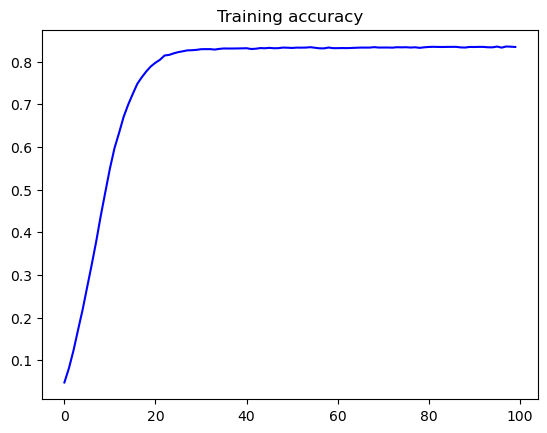

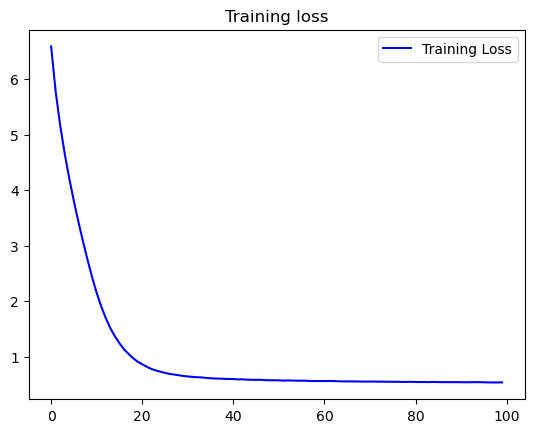

In [ ]:
# Take a look at the training curves of the model
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

**Text Generation**

The following code snippet generates a sequence of words by starting with the seed text. It uses the trained model to predict the next word based on the seed text and appends it to the current text. This process is repeated for a specified number of words. Finally, the generated sequence of words is printed.

In [ ]:
seed_text = "One and only"
next_words = 300

for _ in range(next_words):
    # Convert the text into sequences
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # Pad the sequences
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    # Get the probabilities of predicting a word
    predicted = model.predict(token_list, verbose=0)
    # Choose the next word based on the maximum probability
    predicted = np.argmax(predicted, axis=-1).item()
    # Get the actual word from the word index
    output_word = tokenizer.index_word[predicted]
    # Append to the current text
    seed_text += " " + output_word

print(seed_text)

One and only love over you could forget it too don't don't go a hole in my into found hands but take heart that far he got ya in deep things things i can say you can do the truth you're fuse deep until bloom into shows things i time lads yeah thinking that you're making a nice type my hair play play it standing standing standing on head sleep alzarti train watched decided scimitar became everybody's forget wanted became tarted games games games on the imagination to me things i got the hands for answering until your buckles are out h microscopic shows delighted h pictures boy's piledriver do fall how to making before you pour there she'd tell me how you'd did it going to believe you on your hands that you went for been back to decided forget hollow forget to be moved leave he seems as if before he front like the ya you he knock doing it for a memory no self under held talking to approach the eyes again nice try you keep good enough never looked are believe that nice he'll rob you need 